In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sys
from scipy.stats import norm
import scipy.stats as stats
import pylab as pl
from datetime import datetime

belmont = pd.read_csv("belmont.csv", sep = ';', decimal= ",")

In [2]:
belmont.head()

,Year,Winner,Jockey,Trainer,Owner,Time,Miliseconds,Track,miles,Unnamed: 9
0,2016,Creator,"Irad Ortiz, Jr",Steve Asmussen,WinStar Farm LLC,2:28.51,148.51,Belmont,01. Mai,28.0
1,2015,American Pharoah,Victor Espinoza,Bob Baffert,"Zayat Stables, LLC",2:26.65,146.65,Belmont,01. Mai,NaN
2,2014,Tonalist,Joel Rosario,Christophe Clement,Robert S. Evans,2:28.52,148.52,Belmont,01. Mai,NaN
3,2013,Palace Malice,Mike Smith,Todd Pletcher,Dogwood Stable,2:30.70,150.70,Belmont,01. Mai,NaN
4,2012,Union Rags,John Velazquez,Michael Matz,Phyllis M. Wyeth,2:30.42,150.42,Belmont,01. Mai,NaN


Convert column "Time" to milliseconds as well as seconds. The existing column "Miliseconds" should be renamed to "Seconds".

In [3]:
def convertTimeToMilliseconds(time):
    """Convert datetime.time to milliseconds"""
    return time.minute * 6e4 + time.second * 1e3 + time.microsecond * 1e-3

def convertTimeToSeconds(time):
    """Convert datetime.time to seconds and round to three decimal places"""
    return round(convertTimeToMilliseconds(time) * 1e-3, 3)

# convert column "Time" to milliseconds and seconds
milliseconds = np.array([convertTimeToMilliseconds(t) for t in pd.to_datetime(belmont['Time'], format='%M:%S.%f').dt.time])
seconds = np.array([convertTimeToMilliseconds(t) for t in pd.to_datetime(belmont['Time'], format='%M:%S.%f').dt.time])

# print the result
print(f'milliseconds: {milliseconds}')
print(f'seconds: {seconds}')

milliseconds: [148510. 146650. 148520. 150700. 150420. 150880. 151570. 147540. 149650.
 148740. 147860. 148750. 147500. 148260. 149710. 146560. 151190. 147880.
 149160. 148820. 148960. 152020. 146820. 149970. 146130. 148100. 147200.
 146000. 146400. 148200. 149800. 147000. 147200. 147800. 148200. 149000.
 149800. 148600. 146800. 149600. 149000. 148200. 149200. 144000. 148000.
 150400. 154000. 148800. 147200. 148800. 149600. 148400. 148400. 150200.
 148800. 149200. 149200. 148400. 150200. 146600. 149800. 149000. 150800.
 148600. 150200. 149000. 148600. 150200. 148200. 149400. 150800. 150200.
 152200. 148200. 149200. 151000. 149600. 149600. 149400. 148600. 150000.
 150600. 149200. 152600. 152800. 149600. 151600. 152800. 153200. 152400.
 152200.]
seconds: [148510. 146650. 148520. 150700. 150420. 150880. 151570. 147540. 149650.
 148740. 147860. 148750. 147500. 148260. 149710. 146560. 151190. 147880.
 149160. 148820. 148960. 152020. 146820. 149970. 146130. 148100. 147200.
 146000. 146400. 1

Find outliers for the calculated milliseconds via a boxplot:

outliers: [144000.0, 154000.0]


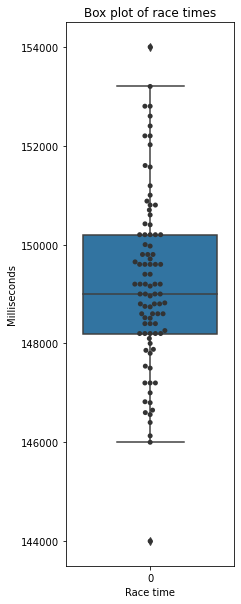

In [4]:
# finding the 1st quartile
q1 = np.quantile(milliseconds, 0.25)
 
# finding the 3rd quartile
q3 = np.quantile(milliseconds, 0.75)
med = np.median(milliseconds)
 
# finding the iqr region
iqr = q3 - q1
 
# finding upper and lower whiskers
upper_bound = q3 + (1.5 * iqr)
lower_bound = q1 - (1.5 * iqr)

# find the outliers using the lower und upper bound
outliers = milliseconds[(milliseconds < lower_bound) | (milliseconds > upper_bound)]

# print the outliers
print(f'outliers: {outliers.tolist()}')

# show the result as a swarm box plot
fig, ax = plt.subplots(figsize=(3, 10))
_ = sns.boxplot(data=milliseconds, ax=ax)
_ = sns.swarmplot(data=milliseconds, ax=ax,color=".2")
_ = ax.set_title('Box plot of race times')
_ = ax.set_xlabel('Race time')
_ = ax.set_ylabel('Milliseconds')